# Movie Classification

* https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/
* https://www.kaggle.com/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn
* https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
* https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
* https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
* https://colab.research.google.com/drive/1NWj4ioKmqtC1xQkC6opATdGZc27Z9miL

## 1. Web Scrapping

ทำการ Scrape โดยเลือกประเภทหนังเป็น Feature Film ในประเทศอเมริกา ตั้งแต่ปี 2018 ถึง 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
sns.set(style='whitegrid', palette="deep", rc={"figure.figsize": [8, 5]})
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from requests import get
from bs4 import BeautifulSoup

page_movie = []

for i in [2018, 2019, 2020, 2021]:
    for j in range(1, 4200, 100):
        url = "https://www.imdb.com/search/title/?title_type=feature&release_date="+str(i)+"-01-01,"+str(i)+"-12-31&countries=us&sort=alpha,asc&count=100&start="+str(j)+"&ref_=adv_nxt"
        response = get(url)
        html_soup = BeautifulSoup(response.text, 'html.parser')
        movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

        names = []
        years = []
        genres = []
        descriptions = []

        for container in movie_containers:

            if (container.find('span', attrs = {'class': 'genre'}) is not None) and ((container.find_all('p', attrs={'class':'text-muted'})[-1].text) != '\nAdd a Plot\n'):

                name = container.h3.a.text
                names.append(name)

                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                genre = container.find('span', attrs = {'class': 'genre'}).text
                genres.append(genre)

                description = container.find_all('p', attrs={'class':'text-muted'})[-1].text
                descriptions.append(description)
        test_df = pd.DataFrame({'movie': names,
                                'year': years,
                                'genres': genres,
                                'descriptions': descriptions})
        page_movie.append(test_df)

df = pd.concat(page_movie).reset_index(drop=True)

In [9]:
import pickle
# df.to_pickle('df.pickle')
df = pd.read_pickle('df.pickle')
df.head(10)

,movie,year,genres,descriptions
0,#1915House,(2018),"\nHorror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,(2018),"\nDrama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,(2018),"\nAction, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,(2018),\nDrama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",(2018),\nMystery,"\nA low budget but slick ""who done it"" involvi..."
5,1/1,(2018),\nDrama,"\nMaybe pregnant, 20 years old Lissa revises h..."
6,10-56,(2018),\nDrama,\nA group of friends go to an island to detox ...
7,11 Henrys,(2018),\nSci-Fi,\nThree parallel versions of the same man (a S...
8,111: The Sunriser,(2018),\nDrama,\nN.Y.P.D. Detective James Morris hunts his yo...
9,12 Strong,(2018),"\nAction, Drama, History",\n12 Strong tells the story of the first Speci...


In [8]:
df.to_excel('df.xlsx', index=False)

In [2]:
df = pd.read_excel('df.xlsx')
df.head()

,movie,year,genres,descriptions
0,#1915House,(2018),"\nHorror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,(2018),"\nDrama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,(2018),"\nAction, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,(2018),\nDrama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",(2018),\nMystery,"\nA low budget but slick ""who done it"" involvi..."


## 2. Data Preparation

In [3]:
df.year.unique()

array(['(2018)', '(I) (2018)', nan, '(II) (2018)', '(III) (2018)',
       '(IV) (2018)', '(V) (2018)', '(IX) (2018)', '(XXIII)',
       '(VI) (2018)', '(VIII) (2018)', '(2019)', '(VII)',
       '(XVIII) (2018)', '(I)', '(II)', '(XVI) (2018)', '(II) (2019)',
       '(I) (2019)', '(IV) (2019)', '(V) (2019)', '(III) (2019)',
       '(VI) (2019)', '(VIII) (2019)', '(XXXV) (2019)', '(VII) (2019)',
       '(X) (2019)', '(IX) (2019)', '(XII) (2019)', '(2020)',
       '(III) (2020)', '(II) (2020)', '(I) (2020)', '(XXI) (2020)',
       '(V) (2020)', '(VI) (2020)', '(IV) (2020)', '(2021)',
       '(VIII) (2020)', '(XI) (2020)', '(I) (2021)', '(II) (2021)',
       '(IV) (2021)', '(XII) (2021)', '(III) (2021)', '(VI) (2021)',
       '(V) (2021)', '(VI)'], dtype=object)

In [4]:
df.year = df.year.str.extract('(\d+)')
df.year = df.year.ffill(axis = 0)
df.year.unique()

array(['2018', '2019', '2020', '2021'], dtype=object)

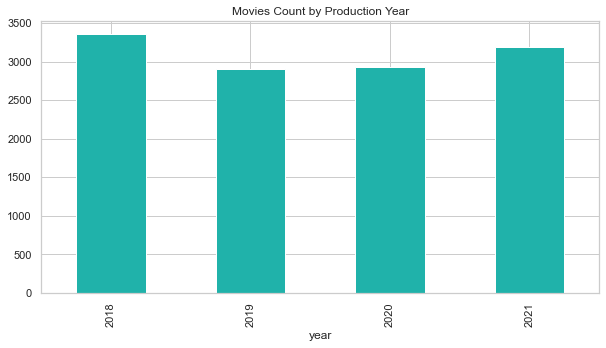

In [5]:
df.groupby(['year']).size().plot(kind='bar', color={'#20B2AA'}, figsize=(10,5), title='Movies Count by Production Year')

In [6]:
df.genres = df.genres.str.strip()
df.head()

,movie,year,genres,descriptions
0,#1915House,2018,"Horror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,2018,"Drama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,2018,"Action, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,2018,Drama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"\nA low budget but slick ""who done it"" involvi..."


In [7]:
genres = df.genres.tolist()
genres = ", ".join(genres)
genres = sorted(list(set(genres.split(", "))))
genres


['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [8]:
for g in genres:
  df[g] = df["genres"].apply(lambda x: 1 if len(set(x.split(", ")).intersection(set([g]))) > 0 else 0)
df.head()

,movie,year,genres,descriptions,Action,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,#1915House,2018,"Horror, Thriller",\nA century of secrets are hidden behind the f...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,#SquadGoals,2018,"Drama, Thriller","\nSamantha is a serious journalist, both for t...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,#Victoria,2018,"Action, Drama",\nVictoria moves from out of town into the poo...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1 Angry Black Man,2018,Drama,\nMike Anderson is a senior at the quintessent...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"\nA low budget but slick ""who done it"" involvi...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(12388, 28)

In [10]:
df.isnull().any()

movie           False
year            False
genres          False
descriptions    False
Action          False
Adventure       False
Animation       False
Biography       False
Comedy          False
Crime           False
Drama           False
Family          False
Fantasy         False
Game-Show       False
History         False
Horror          False
Music           False
Musical         False
Mystery         False
News            False
Reality-TV      False
Romance         False
Sci-Fi          False
Sport           False
Talk-Show       False
Thriller        False
War             False
Western         False
dtype: bool

In [11]:
df.loc[:, genres].sum().sort_values(ascending=False)

Drama         5177
Comedy        3046
Horror        2339
Thriller      2171
Action        1420
Crime          937
Romance        834
Adventure      777
Mystery        714
Sci-Fi         698
Family         569
Animation      503
Fantasy        490
Biography      240
Music          215
Musical        170
Western        150
History        148
Sport          110
War             84
Reality-TV      19
Talk-Show       16
News             7
Game-Show        1
dtype: int64

In [12]:
import re
df.corpus = df.descriptions.str.strip()
df.corpus = df.corpus.str.replace('...                See full summary\xa0»', '', regex=True)
df.corpus = df.corpus.str.lower()
df.corpus = df.corpus.map(lambda x: re.sub('[,\.!?():;$%&*/@#^+=~_{}<>]', '', x))
df.corpus = df.corpus.map(lambda x: re.sub('[`]', '', x))
df.corpus = df.corpus.map(lambda x: re.sub("[']", '', x))
df.corpus = df.corpus.map(lambda x: re.sub('["]', '', x))
df.corpus.tolist()


['a century of secrets are hidden behind the fresh paint and modern additions peeling back the layers is letting something escape and he might not see it till its too late',
 'samantha is a serious journalist both for the school paper and for the yearbook but shes just as serious about her friends nate gillian and rudy all of whom are vying with her for a full-ride local scholarship to college',
 'victoria moves from out of town into the poor inner city of new york with her father the neighborhood drug dealer she goes on a journey seeking answers justice and revenge after her ',
 'mike anderson is a senior at the quintessential new-england liberal arts school frost college and mike is eight weeks away from graduation on this particular day he has his ',
 'a low budget but slick who done it involving the murder of a wealthy businessman the long list of suspects includes the family butler their shady attorney and an assortment of greedy ',
 'maybe pregnant 20 years old lissa revises her 

In [13]:
import nltk
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *


def stopword_removal(x, stpws=stopwords.words("english")):
  return list(set(x).difference(set(stpws)))


def lemmatization(x, stemmer=PorterStemmer()):
  return [stemmer.stem(i) for i in x]


def number_removal(x):
  return [i for i in x if not i.isnumeric()]

df.corpus = df.corpus.apply(lambda x: word_tokenize(x))
df.corpus = df.corpus.apply(lambda x: stopword_removal(x))
df.corpus = df.corpus.apply(lambda x: lemmatization(x))
df.corpus = df.corpus.apply(lambda x: number_removal(x))
df.corpus = df.corpus.apply(lambda x: " ".join(x))
df.corpus.tolist()


['let addit paint late till peel behind fresh centuri hidden someth layer modern back see secret might escap',
 'vy full-rid friend school she paper seriou rudi gillian local scholarship colleg journalist nate yearbook samantha',
 'new inner goe justic father dealer seek neighborhood drug citi town poor journey victoria york move reveng answer',
 'frost eight particular mike anderson art school senior liber day week graduat quintessenti new-england colleg away',
 'shadi budget slick includ done involv low murder suspect butler wealthi assort famili businessman greedi list attorney long',
 'year pregnant revis mayb lissa old life',
 'struggl face friend togeth realiz go island problem detox group',
 'mysteri live other parallel version shift whim three spi intellig man scientist artist',
 'member black valdez hunt compromis morriss brother partnerlov detect status111 parti undercov ralphi feder panther morri younger jame nypd',
 'take forc afghan deploy afghanistan stori leadership tali

## Splitting Dataset

In [19]:
from sklearn.model_selection import train_test_split
y = df.loc[:, genres].values
X_train, X_test, y_train, y_test = train_test_split(df.corpus, y, test_size=0.2, random_state=42)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (9910,), X_test size: (2478,)
Wall time: 14.6 ms


## TFIDF Vetorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf = X_train_tfidf.toarray()

X_test_tfidf = vectorizer.transform(X_test)
X_test_tfidf = X_test_tfidf.toarray()


In [21]:
X_train_tfidf


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
print('X_train_tfidf size: {}, X_test_tfidf size: {}'.format(X_train_tfidf.shape, X_test_tfidf.shape))

X_train_tfidf size: (9910, 1000), X_test_tfidf size: (2478, 1000)


## Classification without LDA

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


### Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB
nb = make_pipeline(StandardScaler(), GaussianNB())
nb = OneVsRestClassifier(nb)
nb.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('gaussiannb', GaussianNB())]))

In [140]:
from sklearn.metrics import f1_score
y_pred_nb = nb.predict(X_test_tfidf)
print('F1-score of Naive Bayes: ' + str(round(f1_score(y_test, y_pred_nb, average='micro')*100, 2)) + '%')

F1-score of Naive Bayes: 25.69%


### Logistic Regression

In [143]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr = OneVsRestClassifier(lr)
lr.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(random_state=42))]))

In [144]:
from sklearn.metrics import f1_score
y_pred_lr = lr.predict(X_test_tfidf)
print('F1-score Logistric Regression: ' + str(round(f1_score(y_test, y_pred_lr, average='micro')*100, 2)) + '%')

F1-score Logistric Regression: 38.47%


### K-Nearest Neighobr

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn.fit(X_train_tfidf, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [129]:
from sklearn.metrics import f1_score
y_pred_knn = knn.predict(X_test_tfidf)
print('F1-score K-Nearest Neighbour: ' + str(round(f1_score(y_test, y_pred_knn, average='micro')*100, 2)) + '%')

F1-score K-Nearest Neighbour: 7.28%


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC())
svc = OneVsRestClassifier(svc)
svc.fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.metrics import f1_score
y_pred_svc = svc.predict(X_test_tfidf)
print('F1-score Support Vector Machine: ' + str(round(f1_score(y_test, y_pred_svc, average='micro')*100, 2)) + '%')

### Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier
dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
dt.fit(X_train_tfidf, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [133]:
from sklearn.metrics import f1_score
y_pred_dt = dt.predict(X_test_tfidf)
print('F1-score Decistion Tree: ' + str(round(f1_score(y_test, y_pred_dt, average='micro')*100, 2)) + '%')

F1-score Support Vector Machine: 32.07%


### Random Forest

In [24]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
rf.fit(X_train_tfidf, y_train)

Wall time: 33.7 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [122]:
from sklearn.metrics import f1_score
y_pred_rf = rf.predict(X_test_tfidf)
print('F1-score: ' + str(round(f1_score(y_test, y_pred_rf, average='micro')*100, 2)) + '%')

F1-score: 31.3%


### XGBoost

In [136]:
from xgboost import XGBClassifier
xgb = make_pipeline(StandardScaler(), XGBClassifier(random_state=42, eval_metric='mlogloss'))
xgb = OneVsRestClassifier(xgb)
xgb.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('xgbclassifier',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                                             interaction_constrain

In [137]:
from sklearn.metrics import f1_score
y_pred_xgb = xgb.predict(X_test_tfidf)
print('F1-score: ' + str(round(f1_score(y_test, y_pred_xgb, average='micro')*100, 2)) + '%')

F1-score: 33.67%


## Classification with LDA

In [155]:
from sklearn.decomposition import LatentDirichletAllocation

#สร้าง model LDA โดยกำหนดจำนวน topics = 20
lda = LatentDirichletAllocation(n_components=20, random_state=42)

#Fit และ Transform
X_train_lda = lda.fit_transform(X_train_tfidf)
X_test_lda = lda.transform(X_test_tfidf)

lda_components = lda.components_
terms = vectorizer.get_feature_names()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:7]
    top_terms_list = list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ", top_terms_list)

Topic 1:  ['famili', 'brother', 'find', 'life', 'mother', 'year', 'daughter']
Topic 2:  ['that', 'santa', 'master', 'land', 'la', 'realli', 'north']
Topic 3:  ['killer', 'drug', 'serial', 'reveng', 'crime', 'deal', 'murder']
Topic 4:  ['full', 'term', 'legend', 'captur', 'transform', 'see', 'come']
Topic 5:  ['holiday', 'christma', 'danc', 'year', 'littl', 'anim', 'five']
Topic 6:  ['journey', 'life', 'young', 'musician', 'find', 'author', 'stori']
Topic 7:  ['organ', 'far', 'quest', 'futur', 'person', 'goe', 'shadow']
Topic 8:  ['agent', 'plot', 'releas', 'prison', 'retir', 'investig', 'john']
Topic 9:  ['murder', 'found', 'miss', 'kidnap', 'investig', 'killer', 'may']
Topic 10:  ['school', 'high', 'student', 'differ', 'senior', 'bulli', 'act']
Topic 11:  ['cross', 'win', 'path', 'town', 'convinc', 'hunter', 'enter']
Topic 12:  ['post', 'navig', 'earli', 'stand', 'apocalypt', 'world', 'inhabit']
Topic 13:  ['angel', 'lo', 'earth', 'must', 'human', 'alien', 'race']
Topic 14:  ['stori',

In [183]:
nb_lda = make_pipeline(StandardScaler(), GaussianNB())
nb_lda = OneVsRestClassifier(nb)
nb_lda.fit(X_train_lda, y_train)
y_pred_nb_lda = nb_lda.predict(X_test_lda)
sc_nb_lda = f1_score(y_test, y_pred_nb_lda, average='micro')
print('F1-score of Naive Bayes with LDA: ' + str(round(sc_nb_lda*100, 2)) + '%')

F1-score of Naive Bayes with LDA: 22.92%


In [181]:
lr_lda = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr_lda = OneVsRestClassifier(lr)
lr_lda.fit(X_train_lda, y_train)
y_pred_lr_lda = lr_lda.predict(X_test_lda)
sc_lr_lda = f1_score(y_test, y_pred_lr_lda, average='micro')
print('F1-score of Logistic Regression with LDA: ' + str(round(sc_lr_lda*100, 2)) + '%')

F1-score of Logistic Regression with LDA: 11.29%


In [179]:
knn_lda = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_lda.fit(X_train_lda, y_train)
y_pred_knn_lda = knn_lda.predict(X_test_lda)
sc_knn_lda = f1_score(y_test, y_pred_knn_lda, average='micro')
print('F1-score of K-Nearest Neighbor with LDA: ' + str(round(sc_knn_lda*100, 2)) + '%')

F1-score of K-Nearest Neighbor with LDA: 20.63%


In [169]:
#svm

In [177]:
dt_lda = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
dt_lda.fit(X_train_lda, y_train)
y_pred_dt_lda = dt_lda.predict(X_test_lda)
sc_dt_lda = f1_score(y_test, y_pred_dt_lda, average='micro')
print('F1-score of Decision Tree with LDA: ' + str(round(sc_dt_lda*100, 2)) + '%')

F1-score of Decision Tree with LDA: 23.15%


In [173]:
rf_lda = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
rf_lda.fit(X_train_lda, y_train)
y_pred_rf_lda = rf_lda.predict(X_test_lda)
sc_rf_lda = f1_score(y_test, y_pred_rf_lda, average='micro')
print('F1-score of Random Forest with LDA: ' + str(round(sc_rf_lda*100, 2)) + '%')

F1-score of Random Forest with LDA: 16.05%


In [175]:
xgb_lda = make_pipeline(StandardScaler(), XGBClassifier(random_state=42, eval_metric='mlogloss'))
xgb_lda = OneVsRestClassifier(xgb_lda)
xgb_lda.fit(X_train_lda, y_train)
y_pred_xgb_lda = xgb_lda.predict(X_test_lda)
sc_xgb_lda = f1_score(y_test, y_pred_xgb_lda, average='micro')
print('F1-score of XGBoost with LDA: ' + str(round(sc_xgb_lda*100, 2)) + '%')

F1-score of XGBoost with LDA: 17.9%


In [ ]:
f1 = []
for i in range(X_test.shape[0]):
  f1.append(f1_score(y_test[i], y_pred_xgb_lda[i]))
f1
#หา sentence ทั้งหมดที่ทำนายผิด หรือถูก เพื่อดูรูปแบบ text